In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from IPython.display import display
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


%matplotlib inline

pd.options.display.max_rows = 4000

In [3]:
# read in training data
train = pd.read_csv('./data/train.csv')
# Format variable names
train.columns = train.columns.str.lower().str.replace(" ", "_")


In [4]:
train.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train.shape

(1460, 81)

In [6]:
train.dtypes

id                 int64
mssubclass         int64
mszoning          object
lotfrontage      float64
lotarea            int64
street            object
alley             object
lotshape          object
landcontour       object
utilities         object
lotconfig         object
landslope         object
neighborhood      object
condition1        object
condition2        object
bldgtype          object
housestyle        object
overallqual        int64
overallcond        int64
yearbuilt          int64
yearremodadd       int64
roofstyle         object
roofmatl          object
exterior1st       object
exterior2nd       object
masvnrtype        object
masvnrarea       float64
exterqual         object
extercond         object
foundation        object
bsmtqual          object
bsmtcond          object
bsmtexposure      object
bsmtfintype1      object
bsmtfinsf1         int64
bsmtfintype2      object
bsmtfinsf2         int64
bsmtunfsf          int64
totalbsmtsf        int64
heating           object


In [7]:
# Check for Nulls
null_pct = train.isnull().mean()
print(null_pct.sort_values(ascending = False).head())

poolqc         0.995205
miscfeature    0.963014
alley          0.937671
fence          0.807534
fireplacequ    0.472603
dtype: float64


In [12]:
#Fill Non-Numeric Nulls
train['fireplacequ'].fillna("NA", inplace = True)
train['poolqc'].fillna("NA", inplace = True)
train['alley'].fillna('NA', inplace = True)


In [14]:
# Remove outliers from House size feature
indexNames = train[train['grlivarea'] > 4000].index
train.drop(indexNames, inplace = True)

indexNames = train[train['saleprice'] > 500000].index
train.drop(indexNames, inplace = True)

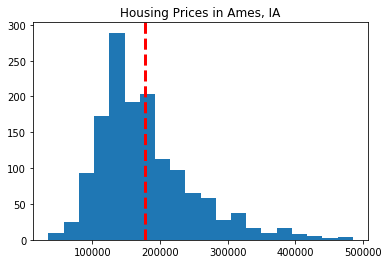

In [15]:
# Distribution of Target Vector
ax = plt.hist((train['saleprice']), bins = 20);
plt.title("Housing Prices in Ames, IA");
plt.axvline(train['saleprice'].mean(), color='red', linestyle='dashed', linewidth=3);




In [16]:
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(["saleprice"], ascending = False, inplace = True)
print(corr.saleprice)


Find most important features relative to target
saleprice        1.000000
overallqual      0.807401
grlivarea        0.714479
garagecars       0.655041
garagearea       0.639554
totalbsmtsf      0.635227
1stflrsf         0.615729
fullbath         0.554476
yearbuilt        0.544601
yearremodadd     0.532315
totrmsabvgrd     0.514948
garageyrblt      0.507114
fireplaces       0.472650
masvnrarea       0.447362
bsmtfinsf1       0.379291
lotfrontage      0.357752
openporchsf      0.338072
wooddecksf       0.332323
2ndflrsf         0.293517
halfbath         0.284453
lotarea          0.256306
bsmtfullbath     0.237959
bsmtunfsf        0.223956
bedroomabvgr     0.166569
screenporch      0.097254
mosold           0.074408
3ssnporch        0.053711
poolarea         0.036589
bsmtfinsf2      -0.014062
miscval         -0.020258
lowqualfinsf    -0.023954
id              -0.032725
bsmthalfbath    -0.033073
yrsold          -0.036550
overallcond     -0.072269
mssubclass      -0.085949
enclosedporch   

In [41]:
# Make testing features

def clean_df(df):
    features = [ 
        # top 10 most correlated features with sale price
         'overallqual', 'garagearea',
           '1stflrsf', 'yearbuilt', 'yearremodadd', '2ndflrsf',
            'bsmtcond' 
    ]
    
    
    X = df[features]
   
    
     # Turning Ordinal Rankings into Numeric
    cast = { 'Ex': 5,
            'TA': 3,
            'Gd': 4,
            'Fa': 2,
            'Po': 1,
            'N' : 0,
            'Y': 1,
            0: 0
            }
    
    for cond in ('bsmtcond', 
#                  'bsmt_qual', 'exter_qual' ,
#                   'exter_cond', 'garage_cond', 'kitchen_qual',
#                   'heating_qc','fireplace_qu', 'central_air'
                ):
        X[cond] = X[cond].map(cast) 

        
            # Interactions
    X['total_sf'] = X['1stflrsf'] +  X['2ndflrsf']
    X.drop('1stflrsf', inplace = True, axis = 1)
    X.drop('2ndflrsf', inplace = True, axis = 1)
    
        
# Add locational Dummies
    dummies = pd.get_dummies(df['neighborhood'])


    X = pd.concat([X,dummies], axis = 1)
    X.fillna(0,inplace = True)


    
    return X


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 42)

In [43]:
# Fit Training Model
linreg = LinearRegression()
linreg.fit(X_train,y_train)
linreg.score(X_train,y_train)

0.843417177417737

In [44]:
y_pred = linreg.predict(X_test)

In [45]:
error(y_test, y_pred)

0.2785451874722138

In [24]:
X_train = clean_df(train)
# Ensure train and test datasets are same size
X_train = X_train.drop(['GrnHill', 'Landmrk'], axis = 1)

X_train.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

KeyError: "['GrnHill' 'Landmrk'] not found in axis"

In [25]:
# Set target Vector
y_train = np.log(train['saleprice'])


In [38]:
# Fit Training Model
linreg = LinearRegression()
linreg.fit(X_train,y_train)
linreg.score(X_train,y_train)

0.866193195785074

In [39]:
y_pred = linreg.predict(X_test)

In [40]:
error(y_test, y_pred)

NameError: name 'y_test' is not defined

In [27]:
cross_val_score(linreg, X_train, y_train, cv = 5).mean()

0.8591574104469878

In [28]:
import statsmodels.api as sm



X = sm.add_constant(X_train)



y = np.exp(y_train)



model = sm.OLS(y,X).fit()


model.summary()



C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     250.0
Date:                Tue, 31 Mar 2020   Prob (F-statistic):               0.00
Time:                        20:28:08   Log-Likelihood:                -16928.
No. Observations:                1449   AIC:                         3.392e+04
Df Residuals:                    1418   BIC:                         3.408e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.193e+06   1.28e+05     -9.342      0.000   -1.44e+06   -9.43e+05
overallqual   1.606e+04    987.867     16.256      0.000    1.41e+04     1.8e+04
garagearea      49.6282      4.830     10.275      0.000      40.153      59.103
yearbuilt      313.8013     58.453      5.368      0.000     199.137     428.465
yearremodadd   294.4542     50.545      5.826      0.000     195.304     393.605
bsmtcond      5497.1056   1453.916      3.781      0.000    2645.049    8349.162
total_sf        53.0931      2.214     23.976      0.000      48.749      57.437
Blmngtn      -6.498e+04   9649.726     -6.734      0.000   -8.39e+04   -4.61e+04
Blueste      -8.316e+04   2.04e+04     -4.070      0.000   -1.23e+05   -4.31e+04
BrDale       -8.441e+04   8638.864     -9.772      0.000   -1.01e+05   -6.75e+04
BrkSide      -4.279e+04   5273.547     -8.114      0.000   -5.31e+04   -3.24e+04
ClearCr      -2.334e+04   7378.397     -3.163      0.002   -3.78e+04   -8861.545
CollgCr      -5.393e+04   6879.518     -7.839      0.000   -6.74e+04   -4.04e+04
Crawfor       -2.06e+04   5692.644     -3.619      0.000   -3.18e+04   -9432.477
Edwards      -5.123e+04   5503.338     -9.309      0.000    -6.2e+04   -4.04e+04
Gilbert      -6.118e+04   7316.259     -8.363      0.000   -7.55e+04   -4.68e+04
IDOTRR       -5.628e+04   5868.909     -9.589      0.000   -6.78e+04   -4.48e+04
MeadowV      -6.671e+04   8800.932     -7.580      0.000    -8.4e+04   -4.94e+04
Mitchel       -5.57e+04   6980.330     -7.980      0.000   -6.94e+04    -4.2e+04
NAmes        -4.901e+04   4971.487     -9.858      0.000   -5.88e+04   -3.93e+04
NPkVill      -6.755e+04   1.06e+04     -6.349      0.000   -8.84e+04   -4.67e+04
NWAmes       -5.779e+04   6210.520     -9.305      0.000      -7e+04   -4.56e+04
NoRidge      -1.755e+04   7887.992     -2.225      0.026    -3.3e+04   -2078.243
NridgHt      -7480.7941   7567.975     -0.988      0.323   -2.23e+04    7364.835
OldTown       -6.25e+04   4598.535    -13.590      0.000   -7.15e+04   -5.35e+04
SWISU        -5.502e+04   6727.801     -8.178      0.000   -6.82e+04   -4.18e+04
Sawyer       -4.991e+04   6002.869     -8.315      0.000   -6.17e+04   -3.81e+04
SawyerW      -5.662e+04   7022.866     -8.062      0.000   -7.04e+04   -4.28e+04
Somerst      -5.173e+04   7460.526     -6.934      0.000   -6.64e+04   -3.71e+04
StoneBr      -1.148e+04   8678.014     -1.323      0.186   -2.85e+04    5543.995
Timber       -3.222e+04   7591.879     -4.244      0.000   -4.71e+04   -1.73e+04
Veenker      -9969.7559   1.01e+04     -0.987      0.324   -2.98e+04    9850.781
==============================================================================
Omnibus:                      214.634   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              888.164
Skew:      

In [31]:
# Bring in Testing Data
test = pd.read_csv('./data/test.csv')
test.columns = test.columns.str.lower().str.replace(" ", "_")
test.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [32]:
test.shape

(1459, 80)

In [33]:
X_test = clean_df(test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [35]:
y_pred = linreg.predict(X_test)

In [36]:
def error(actual, predicted):
    actual = np.log(actual)
    predicted = np.log(predicted)
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))



In [37]:
error(y_test, y_pred)

NameError: name 'y_test' is not defined

In [73]:

submission = pd.DataFrame(test['id'], columns = ['id'])

submission['SalePrice'] = np.exp(y_pred)

submission.to_csv('./datasets/submission.csv', index=False)


In [74]:
# Further EDA

train.head()

(train[['saleprice', 'neighborhood', 'gr_liv_area']].groupby('neighborhood').mean().sort_values(by = 'saleprice', ascending = False))

,saleprice,gr_liv_area
neighborhood,,
NridgHt,312681.777778,1922.179487
NoRidge,310587.617021,2434.638298
StoneBr,289357.781250,1828.062500
GrnHill,280000.000000,1398.500000
Veenker,253570.588235,1798.058824
Timber,241051.354167,1660.312500
Somerst,227183.900000,1582.776923
ClearCr,217490.074074,1796.185185
Crawfor,205901.211268,1704.464789


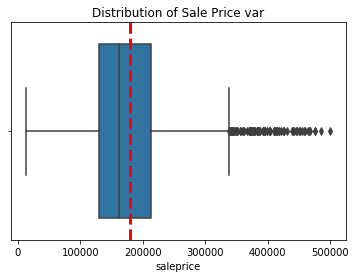

In [75]:
# Distribution of Target Vector
ax = sns.boxplot((train['saleprice']));
plt.title("Distribution of Sale Price var");
plt.axvline(train['saleprice'].mean(), color='red', linestyle='dashed', linewidth=3);

# SKewed towqards lower values, could be outliers in data

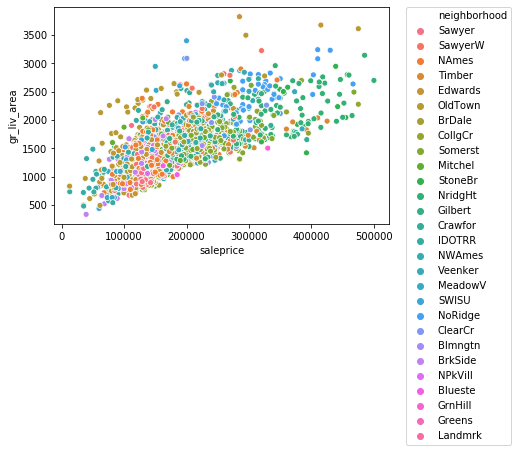

In [76]:
sns.scatterplot(x = train['saleprice'], y = train['gr_liv_area'], hue = train['neighborhood'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



In [77]:
# Add in slides about Year Built, Year Remodel, Garage Quality, Basement Condition

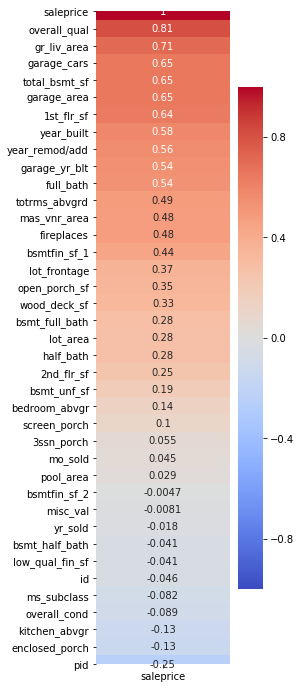

In [78]:
plt.figure(figsize = (3,12))

sns.heatmap(train.corr()[['saleprice']].sort_values(['saleprice'], ascending= False),
           cmap = 'coolwarm',
           vmin = -1,
           vmax = 1,
           annot= True)







In [79]:
train['neighborhood'].value_counts()

NAmes      310
CollgCr    180
OldTown    163
Edwards    141
Somerst    130
NridgHt    117
Gilbert    116
Sawyer     111
SawyerW     87
NWAmes      87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
Timber      48
NoRidge     47
StoneBr     32
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
Veenker     17
NPkVill     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: neighborhood, dtype: int64

In [80]:
train[train['neighborhood'] == "StoneBr"].sort_values(by = 'gr_liv_area')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
339,1632,527182040,120,RL,NaN,3696,Pave,NA,Reg,Lvl,...,0,0,NA,NaN,NaN,0,10,2007,WD,170000
1115,1634,527184020,120,RL,38.0,4740,Pave,NA,IR1,Lvl,...,135,0,NA,NaN,NaN,0,10,2007,WD,182000
156,2327,527182020,120,RL,30.0,3701,Pave,NA,IR1,Lvl,...,0,0,NA,NaN,NaN,0,8,2006,WD,130000
1673,8,527145080,120,RL,43.0,5005,Pave,NA,IR1,HLS,...,144,0,NA,NaN,NaN,0,1,2010,WD,191500
1014,1003,527145090,120,RL,39.0,5070,Pave,NA,IR1,HLS,...,144,0,NA,NaN,NaN,0,8,2008,WD,180000
1231,1635,527184110,120,RL,35.0,5118,Pave,NA,IR1,HLS,...,0,0,NA,NaN,NaN,0,8,2007,WD,212000
429,1002,527140090,120,RL,41.0,5395,Pave,NA,IR1,HLS,...,0,0,NA,NaN,NaN,0,10,2008,WD,180000
1613,1010,527183060,120,RL,65.0,5950,Pave,NA,IR1,HLS,...,0,0,NA,NaN,NaN,0,4,2008,WD,188500
309,366,527182110,120,RL,NaN,5814,Pave,NA,IR1,Lvl,...,0,0,NA,NaN,NaN,0,8,2009,COD,187500
1136,1641,527252070,20,RL,60.0,8089,Pave,NA,Reg,HLS,...,0,0,NA,NaN,NaN,0,10,2007,New,392000
